# OpenCVで畳み込み

## 画像の微分
## 微分について
微分とはある瞬間の変化量のことです。

関数f(x)のxについて微分するとは、xの小さな変化で関数f(x)の値がどれくらい変化するかということです。  
関数f(x)を微分することで、xでの接線の傾きが求められます。

<strong>微分とは、限りなく0に近い区間の傾きを求めることです。</strong>

このことを $\frac{df(x)}{dx}$ として表します。  
これはf(x)のxについての微分係数（微分）といいます。
そして、微分係数はxの値における接線の傾きを意味します。  
xの小さな変化量hを $\lim_{h \rightarrow 0}$ のように表します。

式で表すと次のようになります。

$$
\frac{df(x)}{dx}=\lim_{h \rightarrow 0}\frac{f(x+h)-f(x)}{h}
$$

![代替テキスト](https://itstudio.co/sample/images/lim1.png)
### 画像の微分
連続的な値の微分は上の式で求まりますが、画像の場合は連続的な値ではなく離散的な値になっています。  
つまり、個別の値を持った画素が2次元で並んでいる状態です。
このように離散型の数値では通常の数値微分の式が使えません。  
それは少し想像していただくとわかるように限りなく0に近づけたhという値の設定は連続値にしか使えないからです。

画像の画素は2次元に分布しています。ここでは話をシンプルにするためにまず1次元で考えてみます。  
直感的に言うと、横に画素が1列に並んでいる状態です。

### 1次微分によるエッジ検出
数値微分の式から、ここではhの値を1または、-1に固定します。  
そうすると通常の微分の式から次の式が求まります。

$$
\frac{df(x)}{dx}=f(x+1)-f(x)\\
\frac{df(x)}{dx}=f(x)-f(x-1)
$$

あるいは次のようにすることもできます。
$$
\frac{df(x)}{dx}=\frac{f(x+1)-f(x-1)}{2}
$$

この式は次のカーネルを適用した場合と同じになります。
x方向
$$
F_x=\frac{1}{2} \begin{pmatrix} 0 & 0 & 0 \\ -1 & 0 & 1 \\ 0 & 0 & 0 \end{pmatrix}
$$

y方向
$$
F_y=\frac{1}{2} \begin{pmatrix} 0 & -1 & 0 \\ 0 & 0 & 0 \\ 0 & 1 & 0 \end{pmatrix}
$$

これが1次微分によるエッジ抽出の考え方です。


## 画像の微分


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
cp  /content/drive/'My Drive'/images/mika2.jpg ./

### 画像の読み込み
画像はグレースケールで読み込んでいます。
そのままでも使えますが、今回matplotlibを使っているため、一旦RGBに変更しています。

In [0]:
img_bgr =cv2.imread('mika2.jpg',0)
img = cv2.cvtColor(img_bgr, cv2.COLOR_GRAY2RGB)

(1, 12)


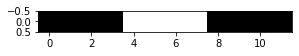

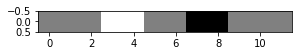

In [35]:
X = np.array([[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]],dtype=float)
print(X.shape)

plt.figure(figsize=(10, 5), dpi=72)
plt.subplot(1,2,1); plt.imshow(X, cmap='gray')
plt.show()

# カーネル
W1 = np.array([[-0.5, 0, 0.5]])

# 畳み込み
C1 = np.copy(X)
for i in range(3,13,1):
  C1[0,i-2] = np.dot(X[0,i-3:i],W1[0,:])

plt.figure(figsize=(10, 5), dpi=72)
plt.subplot(1,2,2); plt.imshow(C1, cmap='gray')
plt.show()

### 画像の微分の実際
画像の横方向に微分をするフィルターを作成  


In [0]:
kernel1 = np.zeros((3,3))
kernel1[1,0] = -0.5
kernel1[1,2] = 0.5

In [37]:
kernel1

array([[ 0. ,  0. ,  0. ],
       [-0.5,  0. ,  0.5],
       [ 0. ,  0. ,  0. ]])

In [0]:
img_kel1 = cv2.filter2D(img,-1,kernel1)

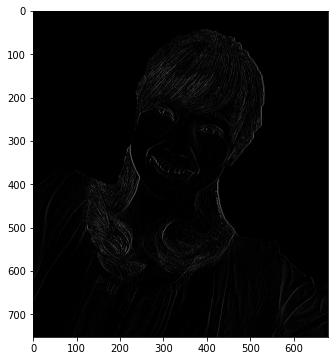

In [39]:
plt.figure(figsize=(6, 6), dpi=72)
plt.imshow(img_kel1)
plt.show()

ノイズに強いカーネル

In [0]:
kernel2 = np.zeros((3,3))
kernel2[0,0] = 1
kernel2[1,0] = 2
kernel2[2,0] = 1
kernel2[0,2] = -1
kernel2[1,2] = -2
kernel2[2,2] = -1


In [41]:
kernel2

array([[ 1.,  0., -1.],
       [ 2.,  0., -2.],
       [ 1.,  0., -1.]])

In [0]:
img_kel2 = cv2.filter2D(img,-1,kernel2)

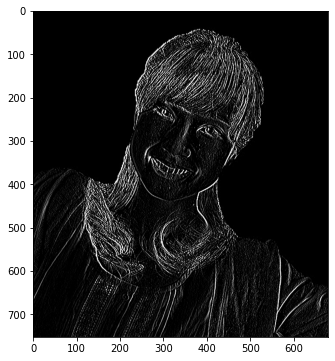

In [43]:
plt.figure(figsize=(6, 6), dpi=72)
plt.imshow(img_kel2)
plt.show()